In [267]:
import matplotlib
matplotlib.use("nbagg")
import math
import numpy.linalg as las
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import scipy
import scipy.io as sio
import re, os, glob, pickle, shutil
from shutil import *
from combi import *


### Get plots for clamping experiments

In [276]:
    #Instruct parameters
datas =['ga','gm','ra','rm']#['ra','gm','ga','rm']
general_name = 'clamping_HO_final_8_%s_N%d_'

methods = ['ours','ours_open','domke','random']

display_names = {}
display_names['ours'] = 'OURS-RANDOM'
display_names['ours_open'] = 'OURS-MAXW'
display_names['domke'] = 'BASELINE-MAXW'
display_names['random'] = 'BASELINE-RANDOM'

colors = {}
colors['ours'] = 'r'
colors['ours_open'] = 'b'
colors['domke'] = 'g'
colors['random'] = 'turquoise'

styles = {}
styles[1] = '-'
styles[2] = '--'
styles[3] = '--'

n_ex =3*33

Ns = [13]



<IPython.core.display.Javascript object>


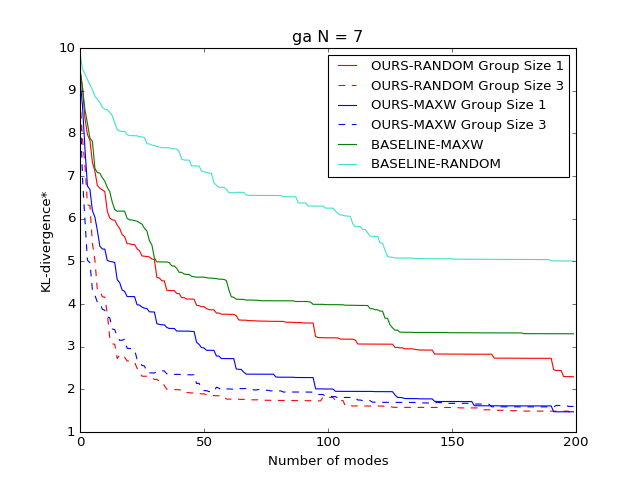

<IPython.core.display.Javascript object>


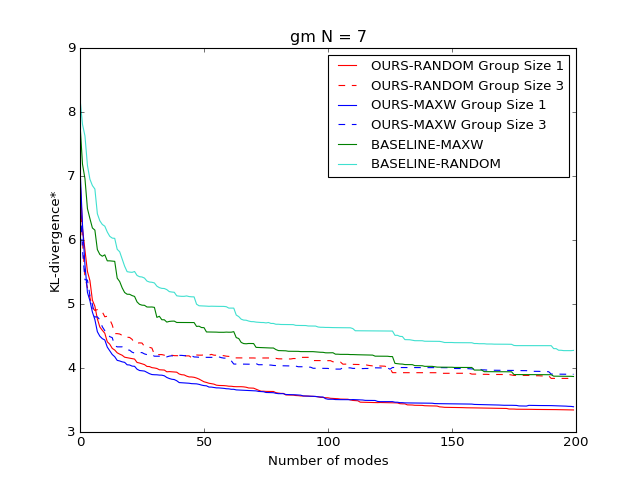

<IPython.core.display.Javascript object>


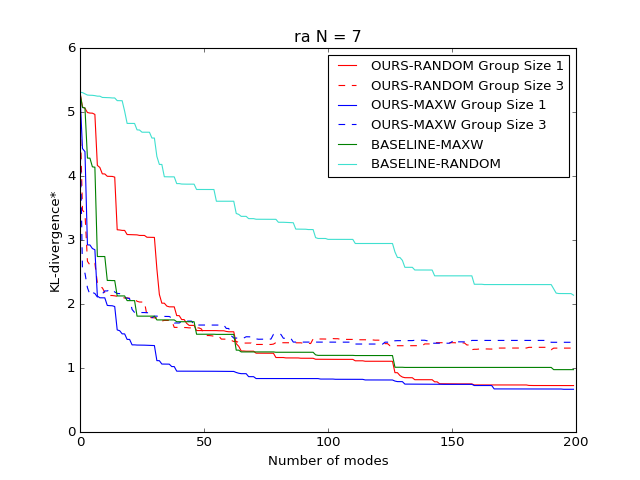

<IPython.core.display.Javascript object>


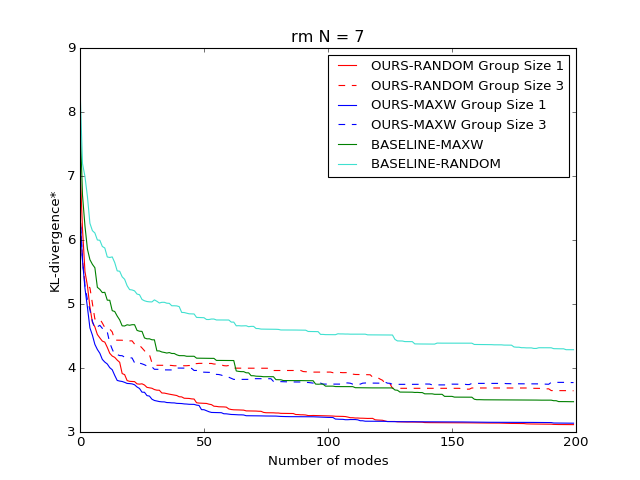

In [236]:

for data in datas:
    for N in [7,13]:
        name = general_name%(data,N)

        TRW_bound_mean = 0
        #load TRW bounds uncomment if they have been saved
        TRW_bound_list = [pickle.load(open('./clamping/'+name+'TRW_bound_%04d.pickle'%(ex))) for ex in range(n_ex)]
        TRW_bound_mean = np.mean(TRW_bound_list)

        for method in methods:
            orders = [1,3]
            if method =='random' or method =='domke':
                orders =[1]

            for order in orders:
                if method =='random' or method =='domke':
                    display_orders = ' '
                else:
                    display_orders = ' Group Size %d'%order

                KL_ours = []
                for ex in range(0,n_ex):
                    Ours = pickle.load(open('./clamping/'+name+'%s_%d_%04d.pickle'%(method,order,ex)))
                    KL_ours.append(Ours)

                indices_to_use = range(len(KL_ours))
                KL_ours_array = np.asarray([KL_ours[i] for i in indices_to_use])
                ours_mean = np.mean(KL_ours_array,axis = 0)
                plt.plot(-1*ours_mean[:] + TRW_bound_mean,(styles[order]),color = (colors[method]),label =(display_names[method]+ display_orders))

        plt.xlabel('Number of modes')
        plt.ylabel('KL-divergence*')
        #plt.ylim(-37,-34.9)
        plt.legend(fontsize = 12,loc =3)
        plt.title(data + ' N = %d'%N)
        #plt.savefig('./plots/'+data + '_N%d.pdf'%N)
        plt.show()


### Same thing in Log-Scale

In [277]:
import random

#estimate mean
all_curves = []
max_init = 0#for the log representation we make them all start at the same level (problem comes from that 1 is 1 node and not 1 mode)

for data in datas:
    print data
    for N in Ns:
        name = general_name%(data,N)

        for method in methods:
            orders = [1,3]
            if method =='random' or method =='domke':
                orders =[1]

            for order in orders:
                KL_ours = []
                for ex in range(0,n_ex):
                    Ours = pickle.load(open('./clamping/'+name+'%s_%d_%04d.pickle'%(method,order,ex)))
                    KL_ours.append(Ours)
                
                ours_mean = np.mean(KL_ours_array,axis = 0)
                max_init = max(ours_mean[0],max_init)
                all_curves.append(ours_mean)
                
mean_curves = np.mean(np.asarray(all_curves),axis = 0)


ga
gm
ra
rm


<IPython.core.display.Javascript object>


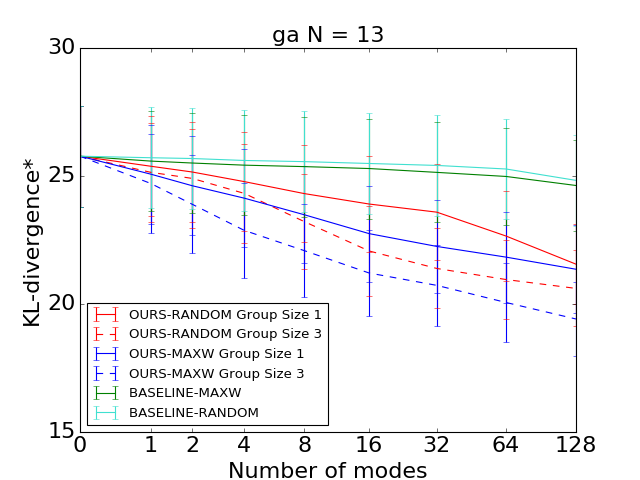

<IPython.core.display.Javascript object>


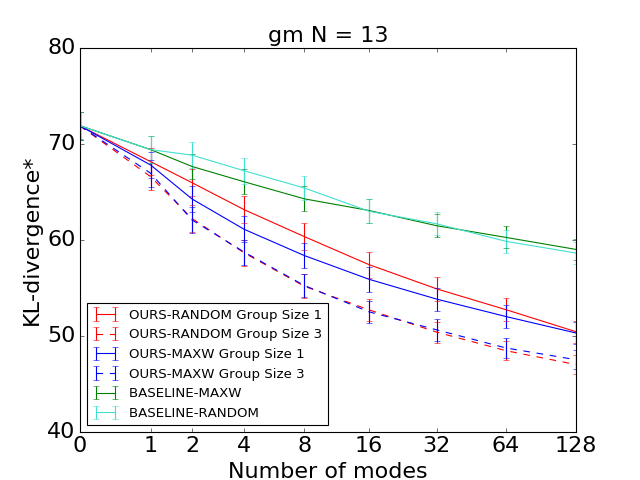

<IPython.core.display.Javascript object>


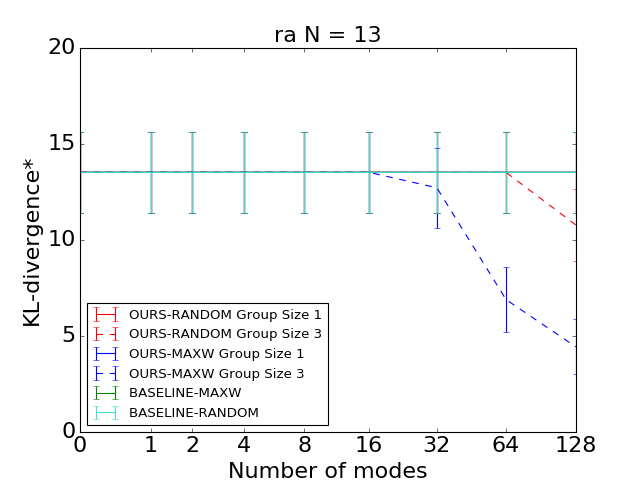

<IPython.core.display.Javascript object>


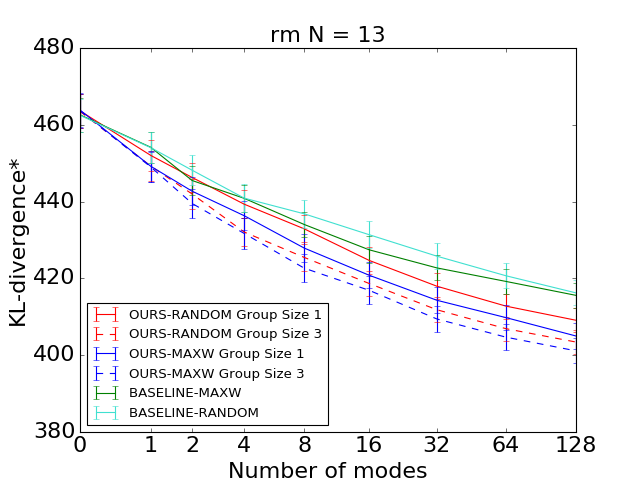

In [278]:
import random

x_indices = np.asarray([0,1,2,4,8,16,32,64,128])

for data in datas:
    for N in Ns:
        name = general_name%(data,N)

        TRW_bound_mean = 0
        #load TRW bounds uncomment if they have been saved
        TRW_bound_list = [pickle.load(open('./clamping/'+name+'TRW_bound_%04d.pickle'%(ex))) for ex in range(n_ex)]
        TRW_bound_mean = np.mean(TRW_bound_list)
        TRW_bound_array = np.asarray(TRW_bound_list)
        for method in methods:
            orders = [1,3]
            if method =='random' or method =='domke':
                orders =[1]

            for order in orders:
                if method =='random' or method =='domke':
                    display_orders = ' '
                else:
                    display_orders = ' Group Size %d'%order

                KL_ours = []
                for ex in range(0,n_ex):
                    Ours = pickle.load(open('./clamping/'+name+'%s_%d_%04d.pickle'%(method,order,ex)))
                    KL_ours.append(Ours)
                    

                indices_to_use = range(len(KL_ours))
                KL_ours_array = np.asarray([KL_ours[i] for i in indices_to_use])
                ours_mean = np.mean(KL_ours_array,axis = 0)
                #ours_mean[0] = max_init
                ours_stddev = np.std(KL_ours_array - TRW_bound_array.reshape((-1,1)).repeat(ours_mean.shape[0],axis =1),axis = 0)
                estimator_stddev = 0*ours_stddev + float('NaN')
                #bar_shift = random.randint(0,20) #Just to display not all bars on the same ticks
                estimator_stddev[:] = ours_stddev[:]/np.sqrt(n_ex)
                if method == 'random' and data == 'gm':
                    ours_mean[1] += 0.7
                plt.errorbar(np.log(x_indices+1),(-1*ours_mean[:] + TRW_bound_mean)[x_indices],yerr = estimator_stddev[x_indices],fmt = (styles[order]),color = (colors[method]),label =(display_names[method]+ display_orders))
                plt.locator_params(nbins=5)
                
                plt.xticks(np.log(x_indices+1), x_indices)
                
        plt.xlabel('Number of modes',fontsize = 20)
        plt.ylabel('KL-divergence*',fontsize = 20)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        #plt.ylim(-37,-34.9)
        plt.legend(fontsize = 12,loc = 3)
        plt.title(data + ' N = %d'%N,fontsize = 20)
        plt.savefig('./plots/'+data + '_N%d'%N + '_errorbar_log_test.pdf')
        plt.show()
